In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

In [2]:
# Load data

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
IDtest = test["PassengerId"]

In [3]:
## Join train and test datasets in order to obtain the same number of features during categorical conversion
train_len = len(train)
dataset =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

C:\Users\KJP\Anaconda3\envs\Data Science\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
# Fill empty and NaNs values with NaN
dataset = dataset.fillna(np.nan)

# Check for Null values
dataset.isnull().sum()

Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [5]:
# Infos
train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [6]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# Summarie and statistics
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.553502,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.058171,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.750000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Apply log to Fare to reduce skewness distribution
dataset["Fare"] = dataset["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

In [9]:
train[["Sex","Survived"]].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [10]:
dataset["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [11]:
# Get Title from Name
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in dataset["Name"]]
dataset["Title"] = pd.Series(dataset_title)
dataset["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [12]:
# Convert to categorical values Title 
dataset["Title"] = dataset["Title"].replace(['Capt', 'Col', 'Dr', 'Major', 'Rev'], 'Officer')
dataset["Title"] = dataset["Title"].replace(['Lady', 'the Countess','Countess','Don', 'Sir', 'Jonkheer', 'Dona'], 'Royalty')
dataset["Title"] = dataset["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Officer":3, "Royalty":4})
dataset["Title"] = dataset["Title"].astype(int)

In [13]:
# Drop Name variable
dataset.drop(labels = ["Name"], axis = 1, inplace = True)

In [14]:
# Create a family size descriptor from SibSp and Parch
dataset["Fsize"] = dataset["SibSp"] + dataset["Parch"] + 1

In [15]:
# Create new feature of family size
dataset['Single'] = dataset['Fsize'].map(lambda s: 1 if s == 1 else 0)
dataset['SmallF'] = dataset['Fsize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
dataset['LargeF'] = dataset['Fsize'].map(lambda s: 1 if 5 <= s else 0)

In [16]:
# convert to indicator values Title and Embarked 
dataset = pd.get_dummies(dataset, columns = ["Title"])
dataset = pd.get_dummies(dataset, columns = ["Embarked"], prefix="Em")
dataset = pd.get_dummies(dataset, columns = ["Pclass"])

In [17]:
dataset.head()

,Age,Cabin,Fare,Parch,PassengerId,Sex,SibSp,Survived,Ticket,Fsize,...,Title_1,Title_2,Title_3,Title_4,Em_C,Em_Q,Em_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,NaN,1.981001,0,1,male,1,0.0,A/5 21171,2,...,0,1,0,0,0,0,1,0,0,1
1,38.0,C85,4.266662,0,2,female,1,1.0,PC 17599,2,...,1,0,0,0,1,0,0,1,0,0
2,26.0,NaN,2.070022,0,3,female,0,1.0,STON/O2. 3101282,1,...,1,0,0,0,0,0,1,0,0,1
3,35.0,C123,3.972177,0,4,female,1,1.0,113803,2,...,1,0,0,0,0,0,1,1,0,0
4,35.0,NaN,2.085672,0,5,male,0,0.0,373450,1,...,0,1,0,0,0,0,1,0,0,1


In [18]:
dataset["Cabin"].describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: Cabin, dtype: object

In [19]:
dataset["Cabin"].isnull().sum()

1014

In [20]:
# Replace the Cabin number by the type of cabin 'X' if not
dataset["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in dataset['Cabin'] ])

In [21]:
dataset = pd.get_dummies(dataset, columns = ["Cabin"],prefix="Cabin")

In [22]:
dataset["Ticket"].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [23]:
## Treat Ticket by extracting the ticket prefix. When there is no prefix it returns X. 

Ticket = []
for i in list(dataset.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket.append("X")
        
dataset["Ticket"] = Ticket
dataset["Ticket"].head()

0        A5
1        PC
2    STONO2
3         X
4         X
Name: Ticket, dtype: object

In [24]:
dataset = pd.get_dummies(dataset, columns = ["Ticket"], prefix="T")

In [25]:
# Drop useless variables 
dataset.drop(labels = ["PassengerId"], axis = 1, inplace = True)

In [26]:
dataset.head()

,Age,Fare,Parch,Sex,SibSp,Survived,Fsize,Single,SmallF,LargeF,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X
0,22.0,1.981001,0,male,1,0.0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,38.0,4.266662,0,female,1,1.0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,26.0,2.070022,0,female,0,1.0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,35.0,3.972177,0,female,1,1.0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,35.0,2.085672,0,male,0,0.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
dataset = pd.get_dummies(dataset, columns = ["Sex"],prefix="Sex")

In [28]:
'''## Separate train dataset and test dataset

train = dataset[:train_len]
test = dataset[train_len:]
#test.drop(labels=["Survived"],axis = 1,inplace=True)'''

'## Separate train dataset and test dataset\n\ntrain = dataset[:train_len]\ntest = dataset[train_len:]\n#test.drop(labels=["Survived"],axis = 1,inplace=True)'

In [29]:
'''## Separate train features and label 

train["Survived"] = train["Survived"].astype(int)

targets = train["Survived"]

X_train = train.drop(labels = ["Survived"],axis = 1)'''

'## Separate train features and label \n\ntrain["Survived"] = train["Survived"].astype(int)\n\ntargets = train["Survived"]\n\nX_train = train.drop(labels = ["Survived"],axis = 1)'

In [30]:
combined = dataset.drop(labels = ["Survived"], axis = 1)

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [32]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [33]:
def recover_train_test_target():
    global combined
    
    targets = pd.read_csv('train.csv', usecols=['Survived'])['Survived'].values
    train = combined.iloc[:891]
    test = combined.iloc[891:]
    
    return train, test, targets

In [34]:
train, test, targets = recover_train_test_target()

In [35]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

In [36]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

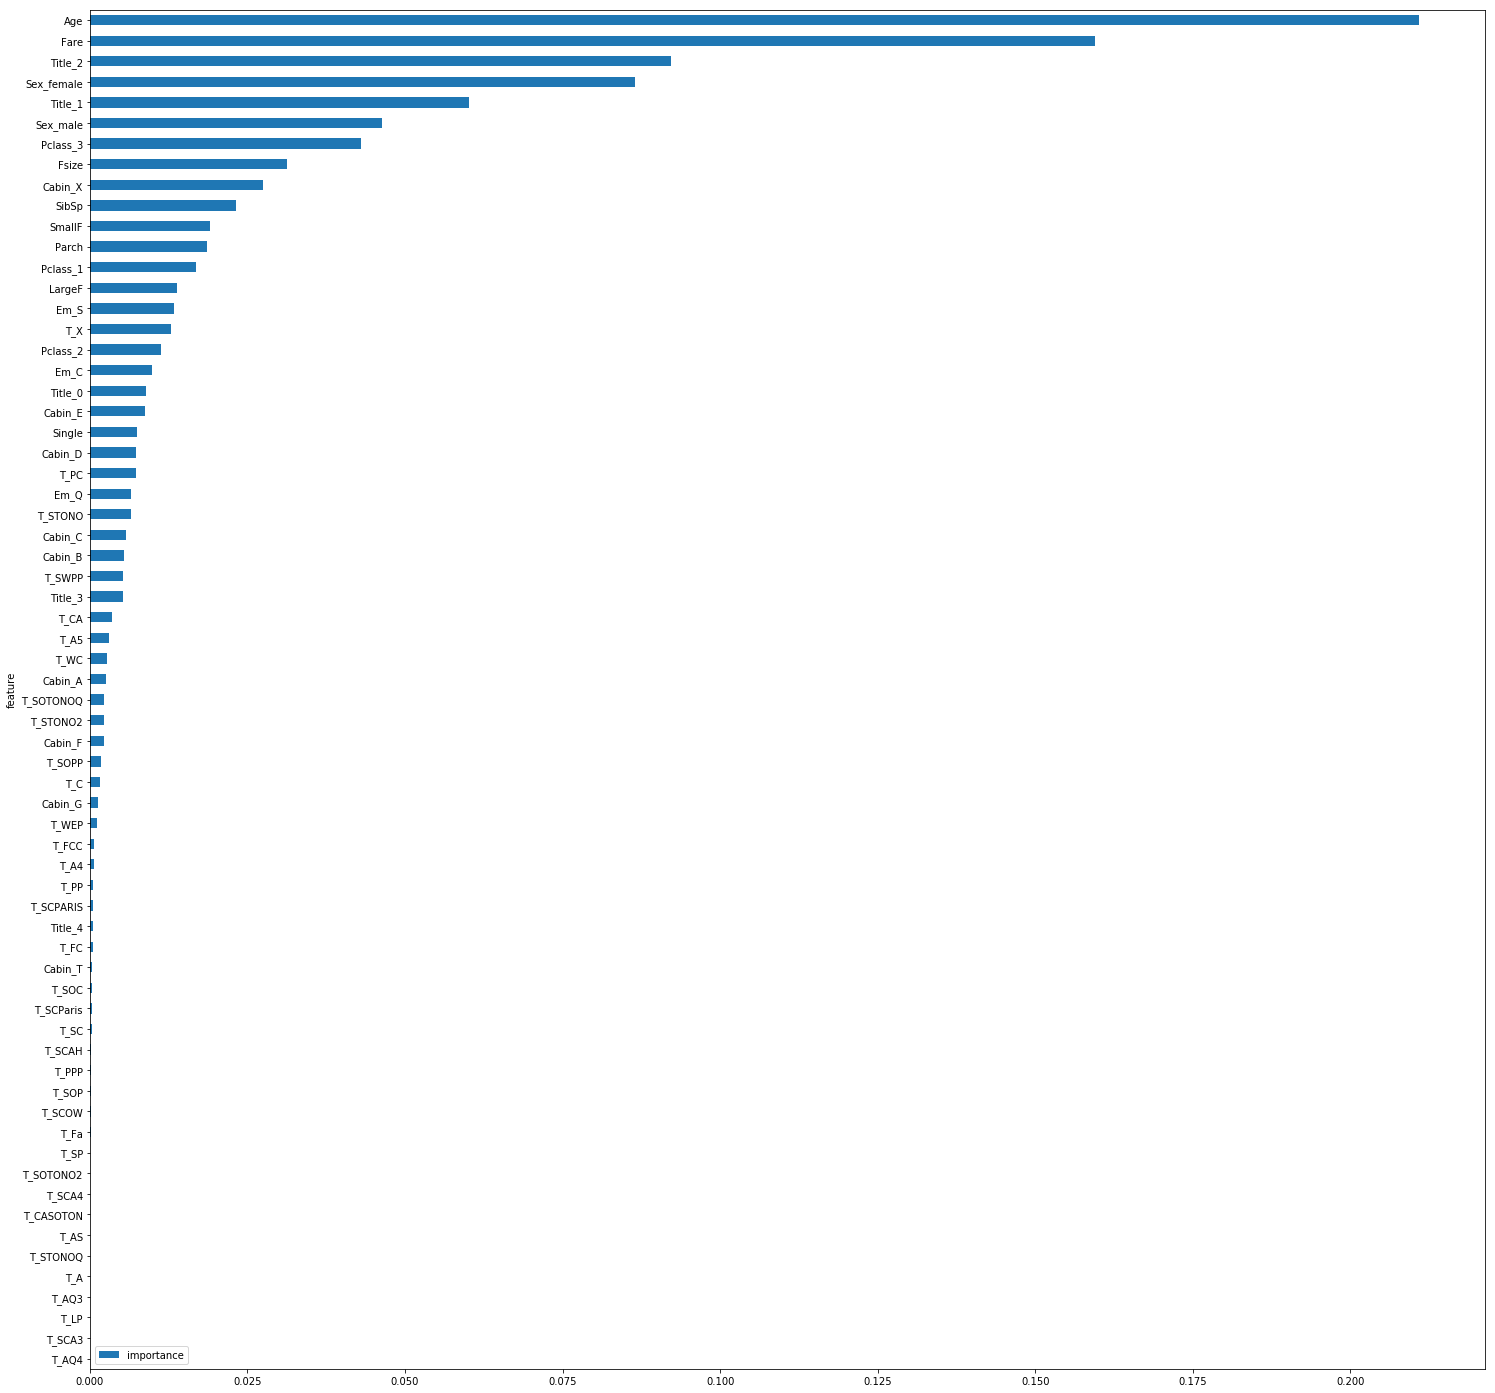

In [37]:
features.plot(kind='barh', figsize=(25, 25))

In [38]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
print(train_reduced.shape)

(891, 13)


In [39]:
test.isnull().sum()

Age           0
Fare          0
Parch         0
SibSp         0
Fsize         0
Single        0
SmallF        0
LargeF        0
Title_0       0
Title_1       0
Title_2       0
Title_3       0
Title_4       0
Em_C          0
Em_Q          0
Em_S          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Cabin_A       0
Cabin_B       0
Cabin_C       0
Cabin_D       0
Cabin_E       0
Cabin_F       0
Cabin_G       0
Cabin_T       0
Cabin_X       0
T_A           0
T_A4          0
             ..
T_CASOTON     0
T_FC          0
T_FCC         0
T_Fa          0
T_LP          0
T_PC          0
T_PP          0
T_PPP         0
T_SC          0
T_SCA3        0
T_SCA4        0
T_SCAH        0
T_SCOW        0
T_SCPARIS     0
T_SCParis     0
T_SOC         0
T_SOP         0
T_SOPP        0
T_SOTONO2     0
T_SOTONOQ     0
T_SP          0
T_STONO       0
T_STONO2      0
T_STONOQ      0
T_SWPP        0
T_WC          0
T_WEP         0
T_X           0
Sex_female    0
Sex_male      0
Length: 66, dtype: int64

In [40]:
test_reduced = model.transform(test)
print(test_reduced.shape)

(418, 13)


In [41]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, logreg_cv, rf, gboost]

In [42]:
for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=train_reduced, y=targets, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('****')

Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegression'>
CV score = 0.8137194759746038
****
Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>


C:\Users\KJP\Anaconda3\envs\Data Science\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KJP\Anaconda3\envs\Data Science\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KJP\Anaconda3\envs\Data Science\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KJP\Anaconda3\envs\Data Science\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KJP\Anaconda3\envs\Data Science\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: 

C:\Users\KJP\Anaconda3\envs\Data Science\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\KJP\Anaconda3\envs\Data Science\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\KJP\Anaconda3\envs\Data Science\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\KJP\Anaconda3\envs\Data Science\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\KJP\Anaconda3\envs\Data Science\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs faile

CV score = 0.8114722140360249
****
Cross-validation of : <class 'sklearn.ensemble.forest.RandomForestClassifier'>
CV score = 0.812652515952446
****
Cross-validation of : <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>


C:\Users\KJP\Anaconda3\envs\Data Science\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\KJP\Anaconda3\envs\Data Science\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\KJP\Anaconda3\envs\Data Science\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CV score = 0.829443819692764
****


In [43]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8, 10],
                 'n_estimators': [100, 50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 7, 10, 15],
                 'min_samples_leaf': [1, 3, 7, 10, 15],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )

    grid_search.fit(train, targets)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, targets)

In [44]:
output = model.predict(test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('gridsearch_rf.csv', index=False)